In [ ]:
#https://learningactors.com/how-to-scrape-multiple-pages-of-a-website-using-a-python-web-scraper/

In [1]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd
from time import sleep
from random import randint

In [2]:
def scrape_page(url):
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    page_soup = soup(page_html,"html.parser")
    containers = page_soup.findAll("div",{"class":"message response box"})
    
    for post in containers:
        text = post.findAll("div",{"class":"details"})[0].findAll("p")[0].text.strip()
        member = post["data-membernickname"]
        star = float(post.findAll("li",{"class":"stars"})[0]["data-rating"].replace(",","."))
        vote = int(post.findAll("li",{"class":"stars"})[0]["data-totalvotes"])
        post_list.append(text)
        member_list.append(member)
        star_list.append(star)
        votes_list.append(vote)
    

In [3]:
post_list = []
member_list = []
star_list = []
votes_list = []

pages = 10

for p in range(1,pages+1):
    url = "https://www.capital.gr/forum/thread/6910285?page=" + str(p)
    sleep(randint(2,10))
    scrape_page(url)

In [4]:
posts_df = pd.DataFrame({
'post': post_list,
'member': member_list,
'stars': star_list,
'votes': votes_list,
})

In [5]:
posts_df["stars"] = posts_df["stars"].astype(float)

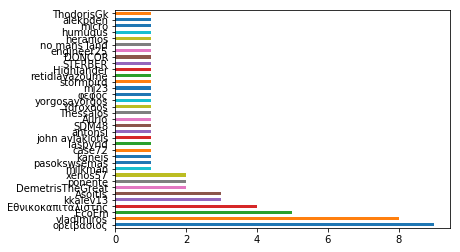

In [12]:
posts_df['member'].value_counts().plot.barh()